In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_df = pd.read_csv(r'C:\Users\Olya\Desktop\учеба\ods.ai\L regression\train-balanced-sarcasm.csv')

In [3]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [4]:
train_df.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


In [5]:
train_df.isna().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [6]:
train_df.dropna(subset = ['comment'], inplace = True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_texts, valid_texts, y_train, y_valid = train_test_split(train_df['comment'], train_df['label'], random_state = 17)

## 1. Analyze the dataset, make some plots.

In [9]:
train_df.label.value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [10]:
%%time
train_df['created_utc'] = train_df['created_utc'].apply(lambda x: pd.to_datetime(x))
train_df['weekday'] = train_df['created_utc'].apply(lambda x: x.weekday())
train_df['hour'] = train_df['created_utc'].apply(lambda x: x.hour)
train_df['month'] = train_df['created_utc'].apply(lambda x: x.month)

Wall time: 5min 18s


<AxesSubplot:xlabel='weekday'>

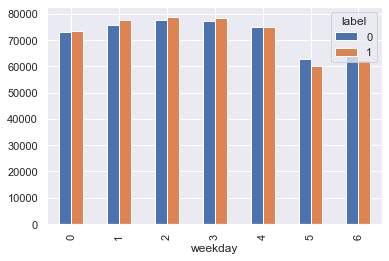

In [11]:
train_df.groupby(['weekday','label'])['comment'].count().unstack().plot.bar()

<AxesSubplot:xlabel='month'>

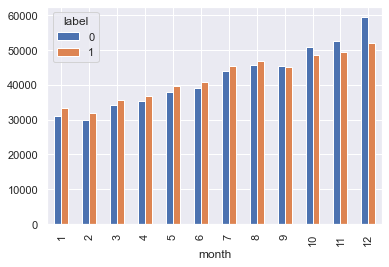

In [12]:
train_df.groupby(['month','label'])['comment'].count().unstack().plot.bar()

<AxesSubplot:xlabel='hour'>

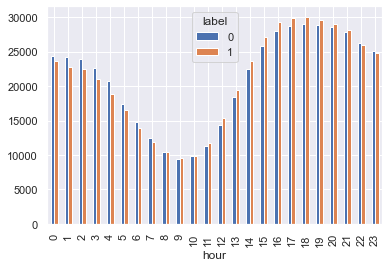

In [13]:
train_df.groupby(['hour', 'label'])['comment'].count().unstack().plot.bar()

In [14]:
train_df['date'] = train_df['created_utc'].apply(lambda x: x.date())

<AxesSubplot:xlabel='date'>

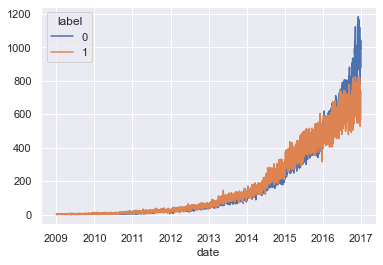

In [15]:
train_df.groupby(['date', 'label'])['comment'].count().unstack().plot.line()

<AxesSubplot:xlabel='date'>

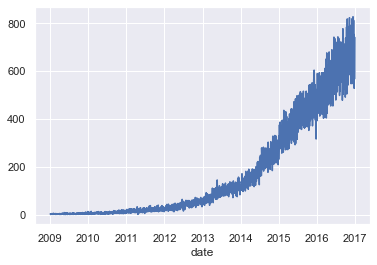

In [16]:
train_df[train_df['label'] == 1].groupby('date')['comment'].count().plot.line()

<AxesSubplot:xlabel='date'>

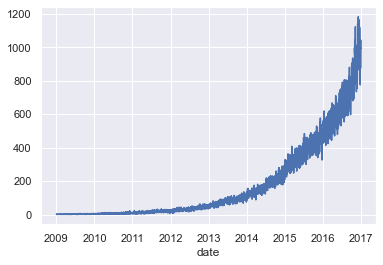

In [17]:
train_df[train_df['label'] == 0].groupby('date')['comment'].count().plot.line()

In [18]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

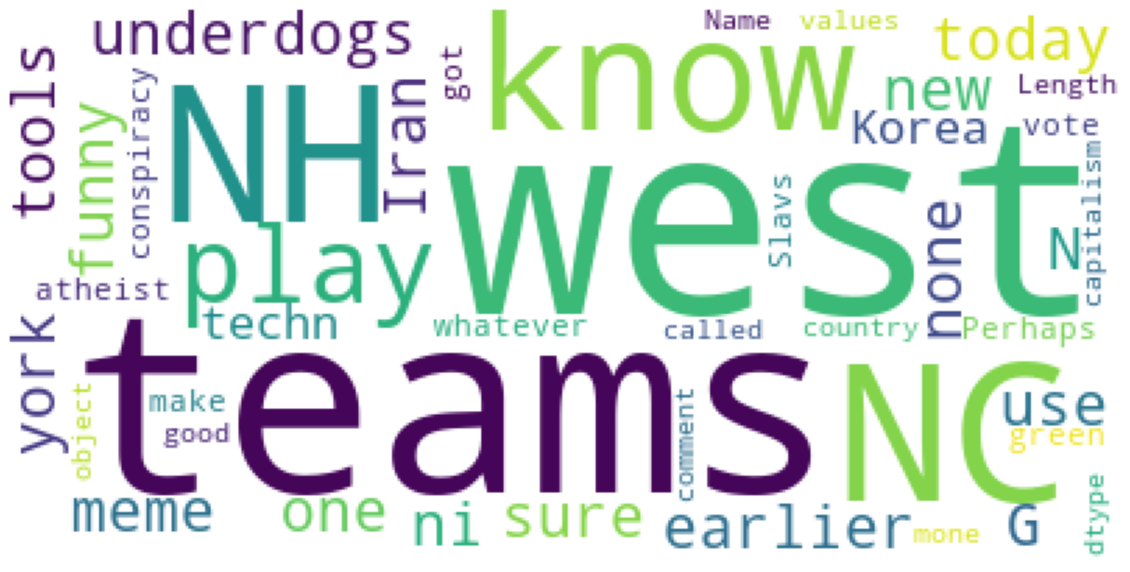

In [19]:
text = str(train_df[((train_df['comment'].apply(len) > 2) == True)]['comment'])

wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

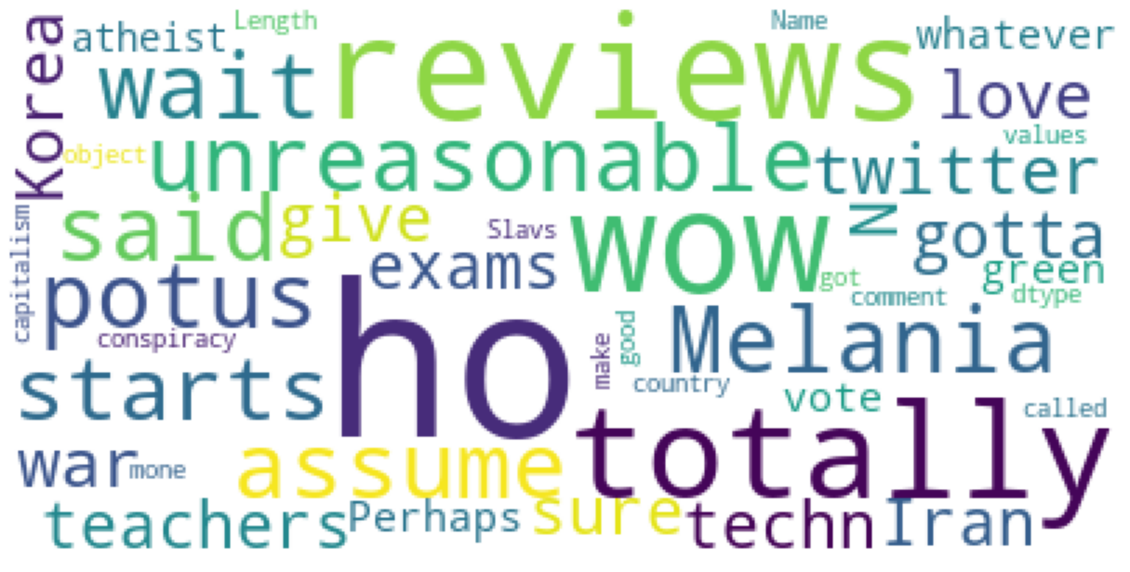

In [20]:
text_sarcastic = str(train_df[
    (train_df['label'] == 1) & ((train_df['comment'].apply(len) > 2) == True)]
                     ['comment'])

wordcloud_sarcastic = WordCloud(max_words = 100, background_color = "white").generate(text_sarcastic)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_sarcastic)
plt.axis("off")
plt.show()

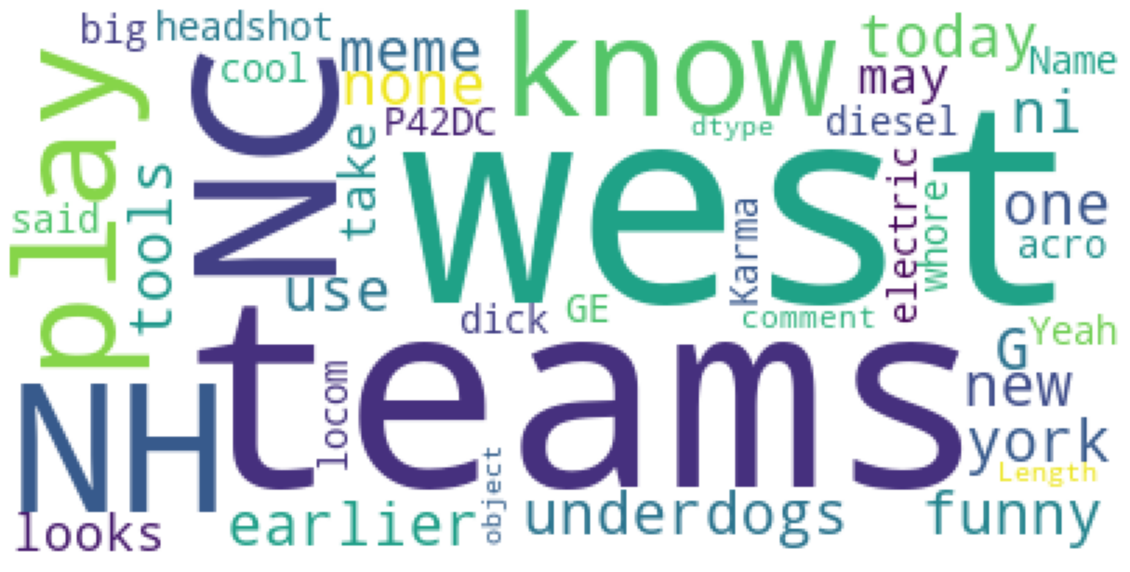

In [21]:
text_non_sarcastic = str(train_df[
    (train_df['label'] == 0) & ((train_df['comment'].apply(len) > 2) == True)]
                     ['comment'])

wordcloud_non_sarcastic = WordCloud(max_words = 100, background_color = "white").generate(text_non_sarcastic)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud_non_sarcastic)
plt.axis("off")
plt.show()

## 2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (label) based on the text of a comment on Reddit (comment).
## 3. Plot the words/bigrams which a most predictive of sarcasm (you can use eli5 for that)
## 4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.